In [288]:
import pandas as pd

import numpy as np

# data visualization
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,recall_score,f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import pickle
# data balancing
from imblearn.over_sampling import SMOTE

# warnings
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
!pip install imblearn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   --- ------------------------------------ 20.5/258.0 kB ? eta -:--:--
   ------------ -------------------------- 81.9/258.0 kB 919.0 kB/s eta 0:00:01
   --------------------------------- ------ 215.0/258.0 kB 1.6 MB/s eta 0:00:01
   --------------------------------- ------ 215.0/258.0 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.3 MB/s eta 0:00:00


## Data Gathering

In [232]:
df = pd.read_csv("fraud_dataset.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [234]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Bringing fraud columns to the beginning of the dataset

In [235]:
df = df[['isFraud','isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [236]:
colums = {'isFraud': 'fraud',
        'isFlaggedFraud':'super_fraud',
        'step':'tempo',
        'type':'type',
          'amount': 'amount', 
          'nameOrig':'Client1',
           'oldbalanceOrg': 'initial_balance_c1', 
           'newbalanceOrig': 'new_balance_c1', 
           'nameDest': 'client2', 
           
         'oldbalanceDest':'initial_balance_c2',
    'newbalanceDest':'new_balance_c2'}

In [237]:
df = df.rename(columns = colums)
df.head()

,fraud,super_fraud,tempo,type,amount,Client1,initial_balance_c1,new_balance_c1,client2,initial_balance_c2,new_balance_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [238]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
fraud,101613.0,0.00,0.03,0.00,0.00,0.00,0.00,1.00
super_fraud,101613.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.52,1.82,1.00,8.00,9.00,10.00,10.00
amount,101613.0,174090.07,345019.90,0.32,10016.59,53385.41,212498.40,10000000.00
initial_balance_c1,101613.0,907175.26,2829575.28,0.00,0.00,20190.47,194715.00,38939424.03
new_balance_c1,101613.0,923499.25,2867318.71,0.00,0.00,0.00,219217.76,38946233.02
initial_balance_c2,101613.0,881042.80,2399949.06,0.00,0.00,21058.00,591921.70,34008736.98
new_balance_c2,101613.0,1183998.10,2797761.08,0.00,0.00,51783.43,1063121.64,38946233.02


In [239]:
df.shape

(101613, 11)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fraud               101613 non-null  int64  
 1   super_fraud         101613 non-null  int64  
 2   tempo               101613 non-null  int64  
 3   type                101613 non-null  object 
 4   amount              101613 non-null  float64
 5   Client1             101613 non-null  object 
 6   initial_balance_c1  101613 non-null  float64
 7   new_balance_c1      101613 non-null  float64
 8   client2             101613 non-null  object 
 9   initial_balance_c2  101613 non-null  float64
 10  new_balance_c2      101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [241]:
df2 = df.groupby(by = 'fraud').agg({'tempo':'count'}).reset_index()

# Calculating Percentage
df2['percent'] = ((df2['tempo'] / 
                  df2['tempo'].sum()) * 100).round(2)
# 
df2

,fraud,tempo,percent
0,0,101497,99.89
1,1,116,0.11


## Encoding

In [242]:

df = pd.get_dummies(data=df, columns=['type'], dtype=int)

# Display the DataFrame with dummy variables in integer format
print(df)

        fraud  super_fraud  tempo      amount      Client1  \
0           0            0      1     9839.64  C1231006815   
1           0            0      1     1864.28  C1666544295   
2           1            0      1      181.00  C1305486145   
3           1            0      1      181.00   C840083671   
4           0            0      1    11668.14  C2048537720   
...       ...          ...    ...         ...          ...   
101608      0            0     10     7477.02   C513257306   
101609      0            0     10   282252.35   C210473293   
101610      0            0     10    17289.01   C807582280   
101611      0            0     10  1347146.45  C1315779140   
101612      0            0     10   469539.21   C515691325   

        initial_balance_c1  new_balance_c1      client2  initial_balance_c2  \
0                170136.00       160296.36  M1979787155                0.00   
1                 21249.00        19384.72  M2044282225                0.00   
2                 

In [243]:
df = df.drop(columns = ['Client1','client2','super_fraud'],axis = 1)
df

,fraud,tempo,amount,initial_balance_c1,new_balance_c1,initial_balance_c2,new_balance_c2,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,0,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,0,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101608,0,10,7477.02,785.00,0.00,0.00,0.00,0,0,0,1,0
101609,0,10,282252.35,220339.29,0.00,95156.01,91286.97,0,1,0,0,0
101610,0,10,17289.01,0.00,0.00,0.00,0.00,0,0,0,1,0
101611,0,10,1347146.45,1605.00,0.00,541639.43,2186953.43,0,0,0,0,1


In [244]:
df

,fraud,tempo,amount,initial_balance_c1,new_balance_c1,initial_balance_c2,new_balance_c2,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,0,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,0,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101608,0,10,7477.02,785.00,0.00,0.00,0.00,0,0,0,1,0
101609,0,10,282252.35,220339.29,0.00,95156.01,91286.97,0,1,0,0,0
101610,0,10,17289.01,0.00,0.00,0.00,0.00,0,0,0,1,0
101611,0,10,1347146.45,1605.00,0.00,541639.43,2186953.43,0,0,0,0,1


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fraud               101613 non-null  int64  
 1   tempo               101613 non-null  int64  
 2   amount              101613 non-null  float64
 3   initial_balance_c1  101613 non-null  float64
 4   new_balance_c1      101613 non-null  float64
 5   initial_balance_c2  101613 non-null  float64
 6   new_balance_c2      101613 non-null  float64
 7   type_CASH_IN        101613 non-null  int32  
 8   type_CASH_OUT       101613 non-null  int32  
 9   type_DEBIT          101613 non-null  int32  
 10  type_PAYMENT        101613 non-null  int32  
 11  type_TRANSFER       101613 non-null  int32  
dtypes: float64(5), int32(5), int64(2)
memory usage: 7.4 MB


In [246]:
df.isna().sum()

fraud                 0
tempo                 0
amount                0
initial_balance_c1    0
new_balance_c1        0
initial_balance_c2    0
new_balance_c2        0
type_CASH_IN          0
type_CASH_OUT         0
type_DEBIT            0
type_PAYMENT          0
type_TRANSFER         0
dtype: int64

In [247]:
x = df.drop('fraud',axis = 1)
y = df['fraud']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)



In [248]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

## Model metrix

In [249]:
y_pred_train = log_reg.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy :",accuracy)
print("*"*50)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion_matrix :\n",cnf_matrix)
print("*"*50)
precision = precision_score(y_train,y_pred_train)
print("precision :",precision)
print("*"*50)
recall = recall_score(y_train,y_pred_train)
print("recall :",recall)
print("*"*50)
F1_score = f1_score(y_train,y_pred_train)
print("F1_score :",F1_score)



accuracy : 0.9989108897899198
**************************************************
confusion_matrix :
 [[76110     6]
 [   77    16]]
**************************************************
precision : 0.7272727272727273
**************************************************
recall : 0.17204301075268819
**************************************************
F1_score : 0.2782608695652174


In [250]:
y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy :",accuracy)
print("*"*50)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion_matrix :\n",cnf_matrix)
print("*"*50)
precision = precision_score(y_test,y_pred)
print("precision :",precision)
print("*"*50)
recall = recall_score(y_test,y_pred)
print("recall :",recall)
print("*"*50)
F1_score = f1_score(y_test,y_pred)
print("F1_score :",F1_score)

accuracy : 0.9989765391276965
**************************************************
confusion_matrix :
 [[25377     4]
 [   22     1]]
**************************************************
precision : 0.2
**************************************************
recall : 0.043478260869565216
**************************************************
F1_score : 0.07142857142857142


## ROC_curve`

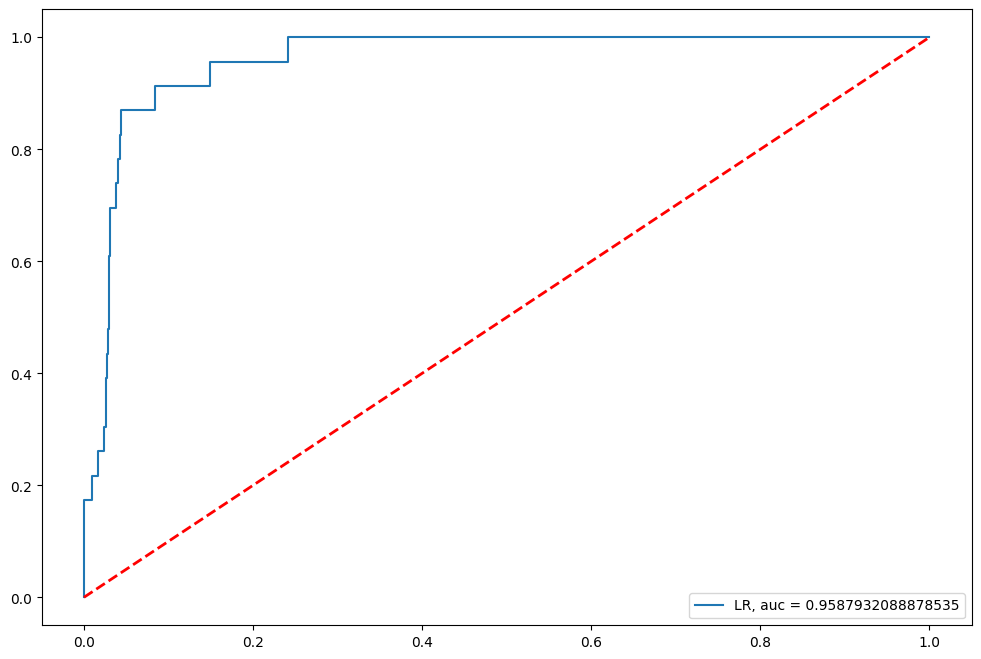

In [251]:
y_pred_proba = log_reg.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LR, auc = ' + str(auc))
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.legend(loc = 4)

## Balancing data

In [252]:
smote = SMOTE(random_state = 42)

In [253]:
x = df.drop('fraud',axis =1)
y = df['fraud']
x_resmapled,y_resampled = smote.fit_resample(x,y)

In [254]:
df_balanced = pd.concat([y_resampled,x_resmapled],axis =1)

In [255]:
df_balanced

,fraud,tempo,amount,initial_balance_c1,new_balance_c1,initial_balance_c2,new_balance_c2,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [256]:

# agroupping fraud label to analyze its frequencies
df_balanced.groupby(by = 'fraud').agg({'tempo':'count'})

,tempo
fraud,
0,101497
1,101497


## A new test with Logistic Regression

In [257]:
x = df_balanced.iloc[:,1:].values
y = df_balanced.iloc[:,0].values

In [258]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [259]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [260]:
y_pred_train = log_reg.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy :",accuracy)
print("*"*50)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion_matrix :\n",cnf_matrix)
print("*"*50)
precision = precision_score(y_train,y_pred_train)
print("precision :",precision)
print("*"*50)
recall = recall_score(y_train,y_pred_train)
print("recall :",recall)
print("*"*50)
F1_score = f1_score(y_train,y_pred_train)
print("F1_score :",F1_score)


accuracy : 0.9501067358533942
**************************************************
confusion_matrix :
 [[73576  2512]
 [ 5084 71073]]
**************************************************
precision : 0.9658626078684515
**************************************************
recall : 0.9332431687172551
**************************************************
F1_score : 0.949272749128501


In [261]:
y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy :",accuracy)
print("*"*50)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion_matrix :\n",cnf_matrix)
print("*"*50)
precision = precision_score(y_test,y_pred)
print("precision :",precision)
print("*"*50)
recall = recall_score(y_test,y_pred)
print("recall :",recall)
print("*"*50)
F1_score = f1_score(y_test,y_pred)
print("F1_score :",F1_score)

accuracy : 0.950797060040592
**************************************************
confusion_matrix :
 [[24542   867]
 [ 1630 23710]]
**************************************************
precision : 0.964723115107621
**************************************************
recall : 0.9356748224151539
**************************************************
F1_score : 0.9499769617565158


Text(0.5, 1.0, 'ROC Curve - Linear Regression')

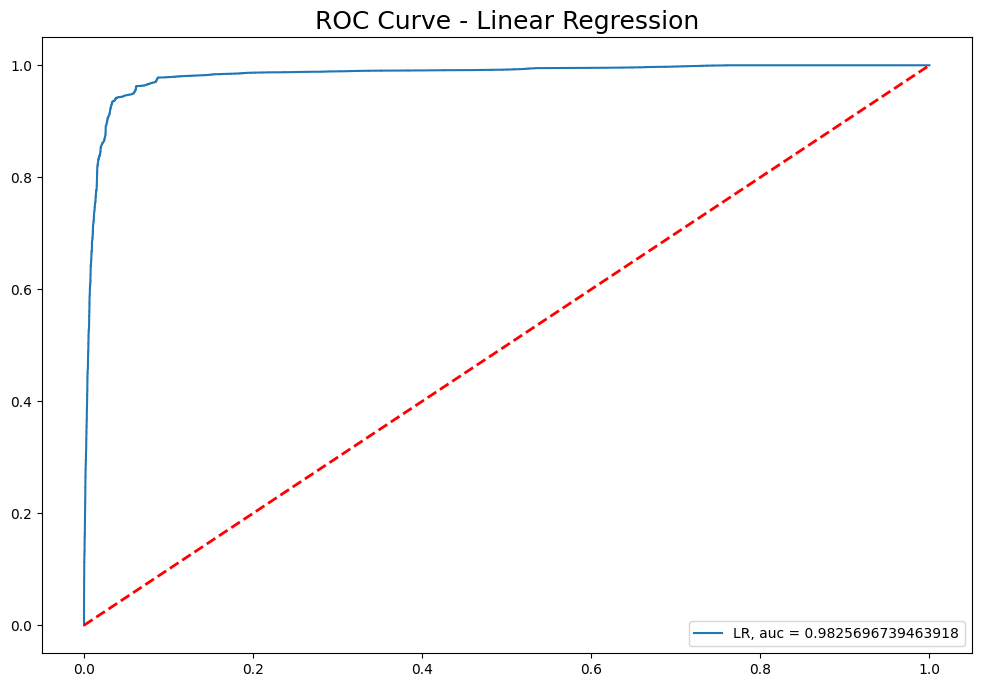

In [262]:

# instantiating ROC curve metrics
y_pred_proba = log_reg.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LR, auc = ' + str(auc))
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.legend(loc = 4)
plt.title('ROC Curve - Linear Regression', fontsize = 18)

## creating comparative models to the logistic regression

In [263]:
dt_clf = DecisionTreeClassifier(max_depth = 5,random_state = 42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [264]:
y_pred_train = dt_clf.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy :",accuracy)
print("*"*50)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion_matrix :\n",cnf_matrix)
print("*"*50)
precision = precision_score(y_train,y_pred_train)
print("precision :",precision)
print("*"*50)
recall = recall_score(y_train,y_pred_train)
print("recall :",recall)
print("*"*50)
F1_score = f1_score(y_train,y_pred_train)
print("F1_score :",F1_score)

accuracy : 0.9608328680744852
**************************************************
confusion_matrix :
 [[70888  5200]
 [  763 75394]]
**************************************************
precision : 0.9354790679206889
**************************************************
recall : 0.9899812229998556
**************************************************
F1_score : 0.9619587753826132


In [265]:
y_pred = dt_clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy :",accuracy)
print("*"*50)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion_matrix :\n",cnf_matrix)
print("*"*50)
precision = precision_score(y_test,y_pred)
print("precision :",precision)
print("*"*50)
recall = recall_score(y_test,y_pred)
print("recall :",recall)
print("*"*50)
F1_score = f1_score(y_test,y_pred)
print("F1_score :",F1_score)

accuracy : 0.9622849711324362
**************************************************
confusion_matrix :
 [[23756  1653]
 [  261 25079]]
**************************************************
precision : 0.9381639982043992
**************************************************
recall : 0.9897000789265983
**************************************************
F1_score : 0.9632432017206944


Text(0.5, 1.0, 'ROC Curve - Decision Tree')

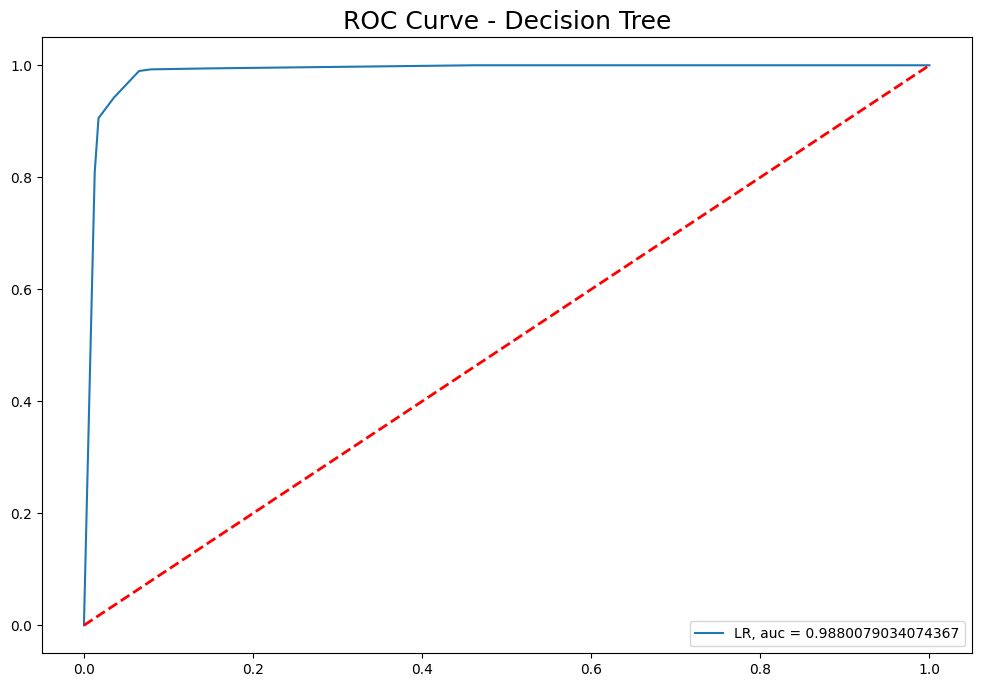

In [266]:
y_pred_proba = dt_clf.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LR, auc = ' + str(auc))
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.legend(loc = 4)
plt.title('ROC Curve - Decision Tree', fontsize = 18)

## Random Forest

In [267]:
# instantiating random forest
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [268]:
y_pred_train = rf_clf.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy :",accuracy)
print("*"*50)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion_matrix :\n",cnf_matrix)
print("*"*50)
precision = precision_score(y_train,y_pred_train)
print("precision :",precision)
print("*"*50)
recall = recall_score(y_train,y_pred_train)
print("recall :",recall)
print("*"*50)
F1_score = f1_score(y_train,y_pred_train)
print("F1_score :",F1_score)

accuracy : 0.9709415744359421
**************************************************
confusion_matrix :
 [[73733  2355]
 [ 2069 74088]]
**************************************************
precision : 0.9691927318394098
**************************************************
recall : 0.9728324382525572
**************************************************
F1_score : 0.9710091743119266


In [269]:
y_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy :",accuracy)
print("*"*50)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion_matrix :\n",cnf_matrix)
print("*"*50)
precision = precision_score(y_test,y_pred)
print("precision :",precision)
print("*"*50)
recall = recall_score(y_test,y_pred)
print("recall :",recall)
print("*"*50)
F1_score = f1_score(y_test,y_pred)
print("F1_score :",F1_score)

accuracy : 0.9723738398786183
**************************************************
confusion_matrix :
 [[24659   750]
 [  652 24688]]
**************************************************
precision : 0.9705165500432424
**************************************************
recall : 0.9742699289660616
**************************************************
F1_score : 0.9723896175509079


Text(0.5, 1.0, 'ROC Curve - Random Forest')

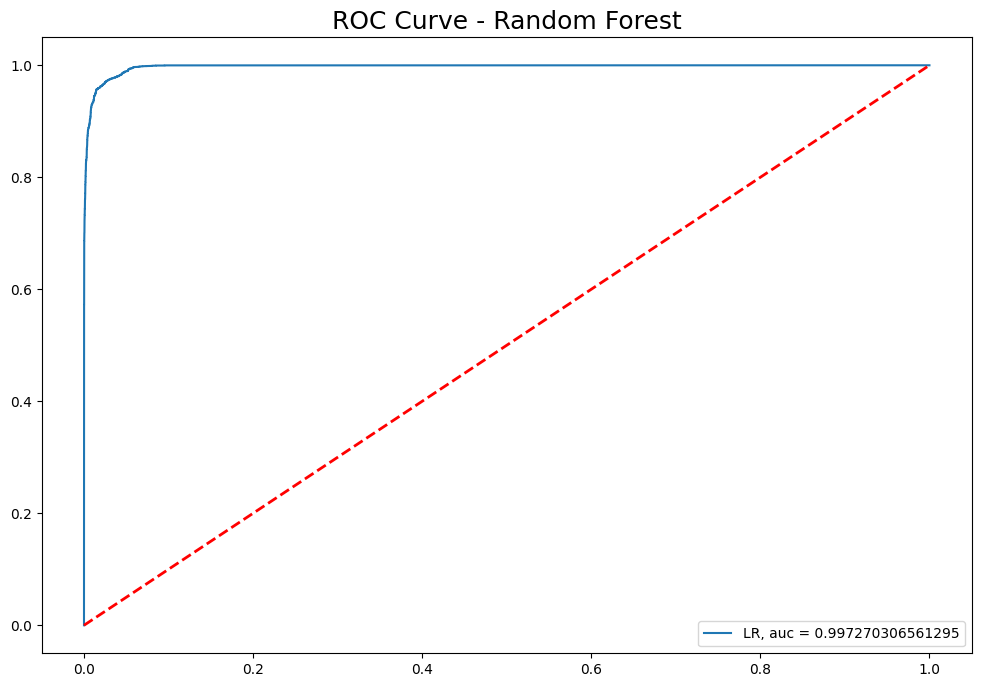

In [270]:
# instantiating ROC curve metrics
y_pred_proba = rf_clf.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LR, auc = ' + str(auc))
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.legend(loc = 4)
plt.title('ROC Curve - Random Forest', fontsize = 18)

## Analyzing model's metrics

In [271]:
classifiers = [
    LogisticRegression(max_iter = 1000, random_state = 42),
    DecisionTreeClassifier(max_depth = 5, random_state = 42),
    RandomForestClassifier(max_depth= 5, random_state = 42)]

LogisticRegression
***Results***
Accuracy: 0.963526374903939
Precision: 0.9634218521879809
Recall: 0.96353591160221
F1 Score: 0.9634788785194247
DecisionTreeClassifier
***Results***
Accuracy: 0.9622849711324362
Precision: 0.9381639982043992
Recall: 0.9897000789265983
F1 Score: 0.9632432017206944
RandomForestClassifier
***Results***
Accuracy: 0.9723738398786183
Precision: 0.9705165500432424
Recall: 0.9742699289660616
F1 Score: 0.9723896175509079


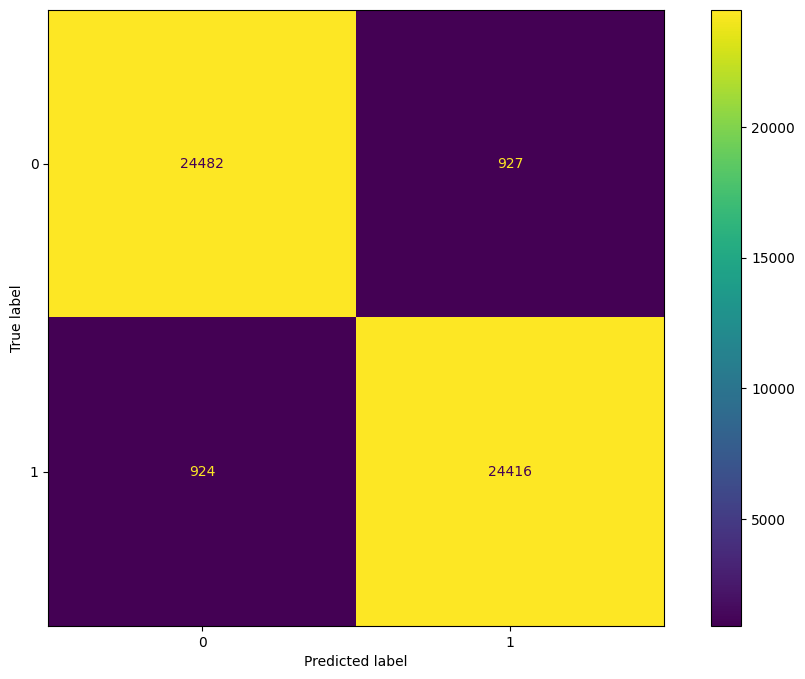

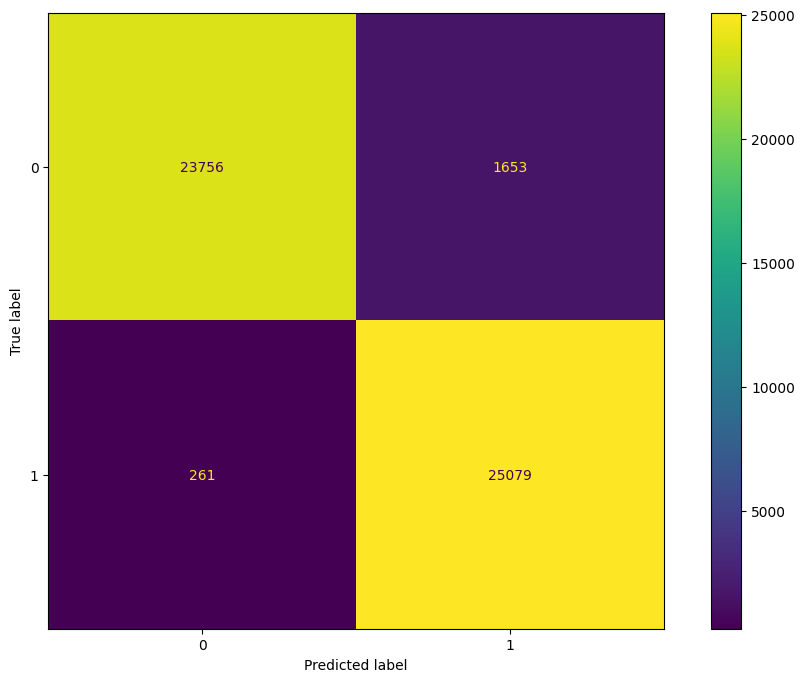

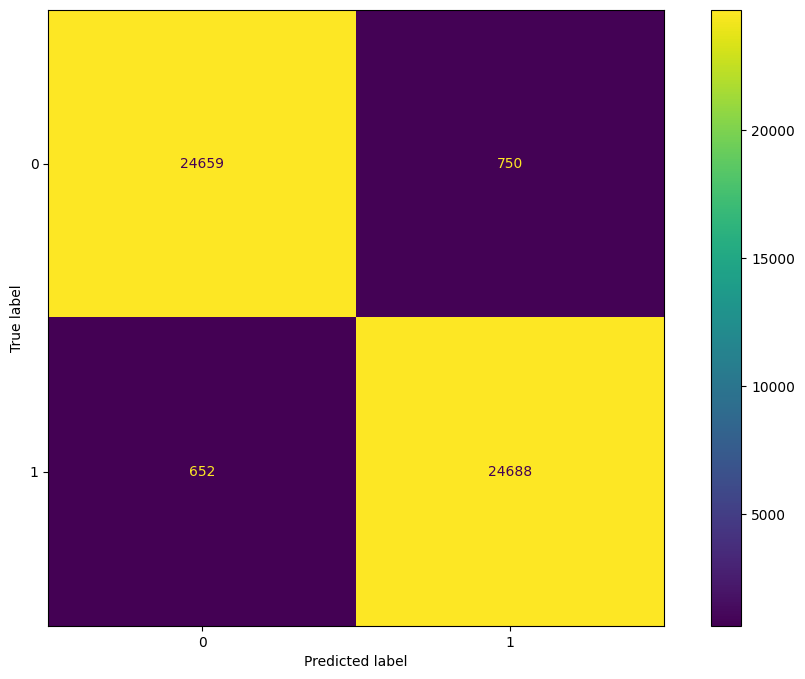

In [272]:

# loop to train the 3 models analyzed
for clf in classifiers:
    # training model
    clf.fit(x_train, y_train)
    # names of model for visualization
    name = clf.__class__.__name__
    print('='*30)
    print(name)
    print('***Results***')
    # predicting labels for each model
    y_pred = clf.predict(x_test)

    # metrics for each model
    # analyzing accuracy
    print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred)))
    # analyzing precision
    print('Precision: {}'.format(metrics.precision_score(y_test, y_pred)))
    # analyzing recall
    print('Recall: {}'.format(metrics.recall_score(y_test, y_pred)))
    # analyzing F1 score
    print('F1 Score: {}'.format(metrics.f1_score(y_test, y_pred)))

    # creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # plotting confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()

## Hyperparameter tuning

In [273]:

# range for n estimators varying from 20 to 2000 
n_estimators = np.arange(20, 2000, step = 20)
# criterions
criterion = ["gini", "entropy"]
# max_features types
max_features = ["auto", "sqrt", "log2"]
# varying depth of trees from 2 to 200
max_depth = list(np.arange(2, 200, step = 1))
# variying the min samples split from 2 to 100
min_samples_split = np.arange(2, 100, step = 2)
# varying the minime leaves' samples
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# bootstrap true or false
bootstrap = [True, False]

In [274]:

# dictionary with parameters to vary
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [275]:
rforest = RandomForestClassifier(random_state = 75)

In [276]:

# hyperparameters on randomized search cv
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter = 5, cv = 3, scoring = "recall", n_jobs = -1, random_state = 75
)

In [277]:
# fitting
rcv = random_cv.fit(x, y)

## Aplying the best hyperparameters in Random Forest

In [279]:
tuning = pd.DataFrame(rcv.cv_results_)

In [280]:
tuning

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,324.575216,40.936645,5.846575,0.895405,720,4,4,log2,120,entropy,True,"{'n_estimators': 720, 'min_samples_split': 4, ...",0.999320,0.999970,0.999734,0.999675,0.000269,1
1,227.065110,34.085939,5.119277,0.832991,600,16,2,sqrt,172,gini,True,"{'n_estimators': 600, 'min_samples_split': 16,...",0.999261,0.999941,0.999675,0.999626,0.000280,2
2,509.475330,61.684633,9.621026,2.242074,1080,34,1,sqrt,115,entropy,True,"{'n_estimators': 1080, 'min_samples_split': 34...",0.999261,0.999941,0.999616,0.999606,0.000278,3
3,1002.315960,93.667317,13.564767,6.552543,1660,88,6,log2,52,entropy,False,"{'n_estimators': 1660, 'min_samples_split': 88...",0.999291,0.999941,0.999468,0.999566,0.000274,4
4,0.044553,0.010677,0.000000,0.000000,960,70,2,auto,100,entropy,False,"{'n_estimators': 960, 'min_samples_split': 70,...",NaN,NaN,NaN,NaN,NaN,5


In [281]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='log2',
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=720, random_state=75)

In [282]:
rfn = RandomForestClassifier(**rcv.best_params_,random_state = 75)
model= rfn.fit(x_train,y_train)

In [ ]:

Final evaluation metrics

In [284]:
y_pred_train = rfn.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy score :",accuracy)

print("*"*50)
precision = precision_score(y_train,y_pred_train)
print("Precision :",precision)
print("*"*50)
F1_score = f1_score(y_train,y_pred_train)
print("F1_SCORE:",F1_score)

confusion matrix :
 [[76043    45]
 [   10 76147]]
**************************************************
accuracy score : 0.999638740188512
**************************************************
Precision : 0.9994093868122638
**************************************************
F1_SCORE: 0.9996389868000446


In [285]:
y_pred = rfn.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy score :",accuracy)

print("*"*50)
precision = precision_score(y_test,y_pred)
print("Precision :",precision)
print("*"*50)
F1_score = f1_score(y_test,y_pred)
print("F1_SCORE:",F1_score)

confusion matrix :
 [[25371    38]
 [    8 25332]]
**************************************************
accuracy score : 0.9990935781985852
**************************************************
Precision : 0.99850216791486
**************************************************
F1_SCORE: 0.9990928810885427


In [289]:
with open("money_laundering.pkl",'wb') as f:
    pickle.dump(rfn,f)

In [290]:
df.columns

Index(['fraud', 'tempo', 'amount', 'initial_balance_c1', 'new_balance_c1',
       'initial_balance_c2', 'new_balance_c2', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')